In [1]:
from datasets import load_dataset

import nibabel as nib

from nibabel.processing import resample_to_output
from concurrent.futures import ThreadPoolExecutor
from matplotlib import pyplot as plt
import numpy as np

/home/pawel/Documents/RISA/3D_segmentation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ct_dataset = load_dataset("andreped/AeroPath")
print('len dataset', ct_dataset['test'].num_rows)

print(ct_dataset)

for index, img in enumerate(range(len(ct_dataset['test']))):
    print(index)     #just stop here to see all file names printed
            
    large_image = ct_dataset['test'][img]

    ct_image = nib.load(large_image["ct"])
    ct_image = resample_to_output(ct_image, order=1)
    ct_data_scan = ct_image.get_fdata().astype("int16")
    ct_data_scan[ct_data_scan < -1024] = -1024
    ct_data_scan[ct_data_scan > 400] = 400

    print("FINISH LOADING CT SCAN")
    # ct_data_scan = (ct_data_scan - np.min(ct_data_scan)) / (np.max(ct_data_scan) - np.min(ct_data_scan))

    # ct_data_scan = ct_data_scan.astype(np.float16)
    # ct_data_scan = np.clip(ct_data_scan, 0, 255).astype("uint8")

    # print("max: ", np.max(ct_data_scan))
    # print("min: ", np.min(ct_data_scan))
    # print("type:", ct_data_scan[0].dtype)

    ct_data_scan = ct_data_scan + 1024
    # print('shape: ', ct_data_scan.shape)

    # print('image: ', ct_data_scan)

    # break

    ct_mask = nib.load(large_image["airways"])
    ct_mask = resample_to_output(ct_mask, order=1)
    ct_data_mask = ct_mask.get_fdata().astype("uint8")

    print("FINISH LOADING CT MASK")

/home/pawel/Documents/RISA/magisterka/.venv/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for andreped/AeroPath contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/andreped/AeroPath
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


len dataset 27
DatasetDict({
    test: Dataset({
        features: ['ct', 'airways', 'lungs'],
        num_rows: 27
    })
})
0
FINISH LOADING CT SCAN
FINISH LOADING CT MASK
1
FINISH LOADING CT SCAN


KeyboardInterrupt: 

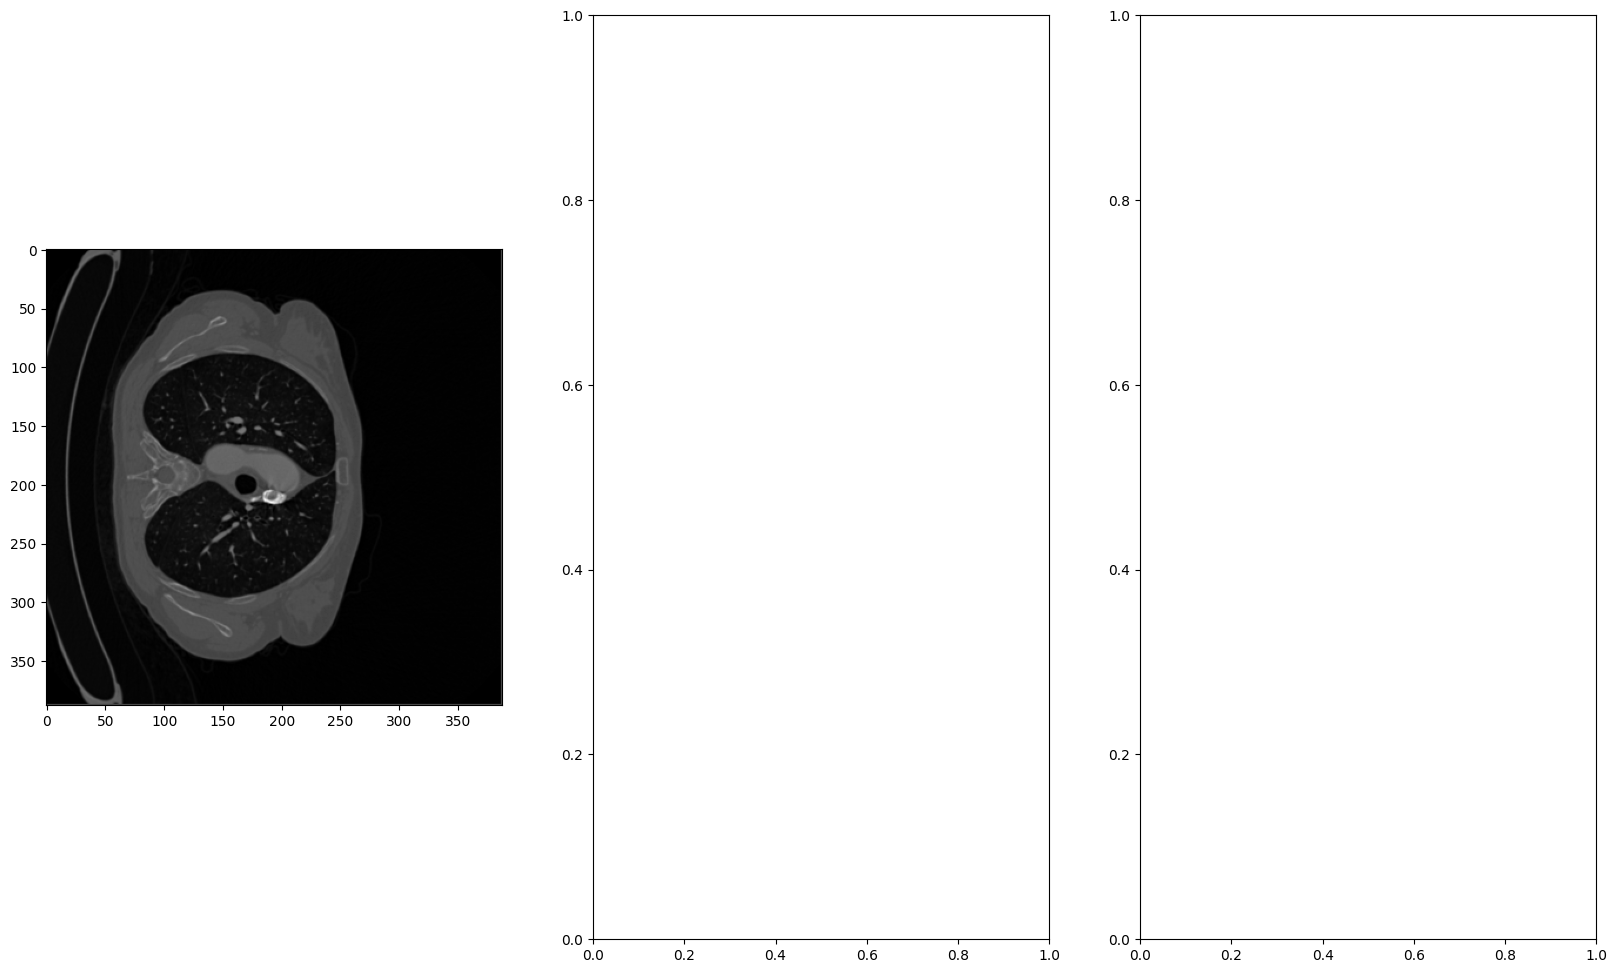

In [5]:
slice_nr = 250

ct_image = nib.load('test.nii.gz')
ct_data = ct_image.get_fdata().astype("int32")

fig, ax = plt.subplots(1, 3, figsize=(20, 12))
ax[0].imshow(ct_data[..., slice_nr], cmap="gray")

plt.show()

(180, 180)


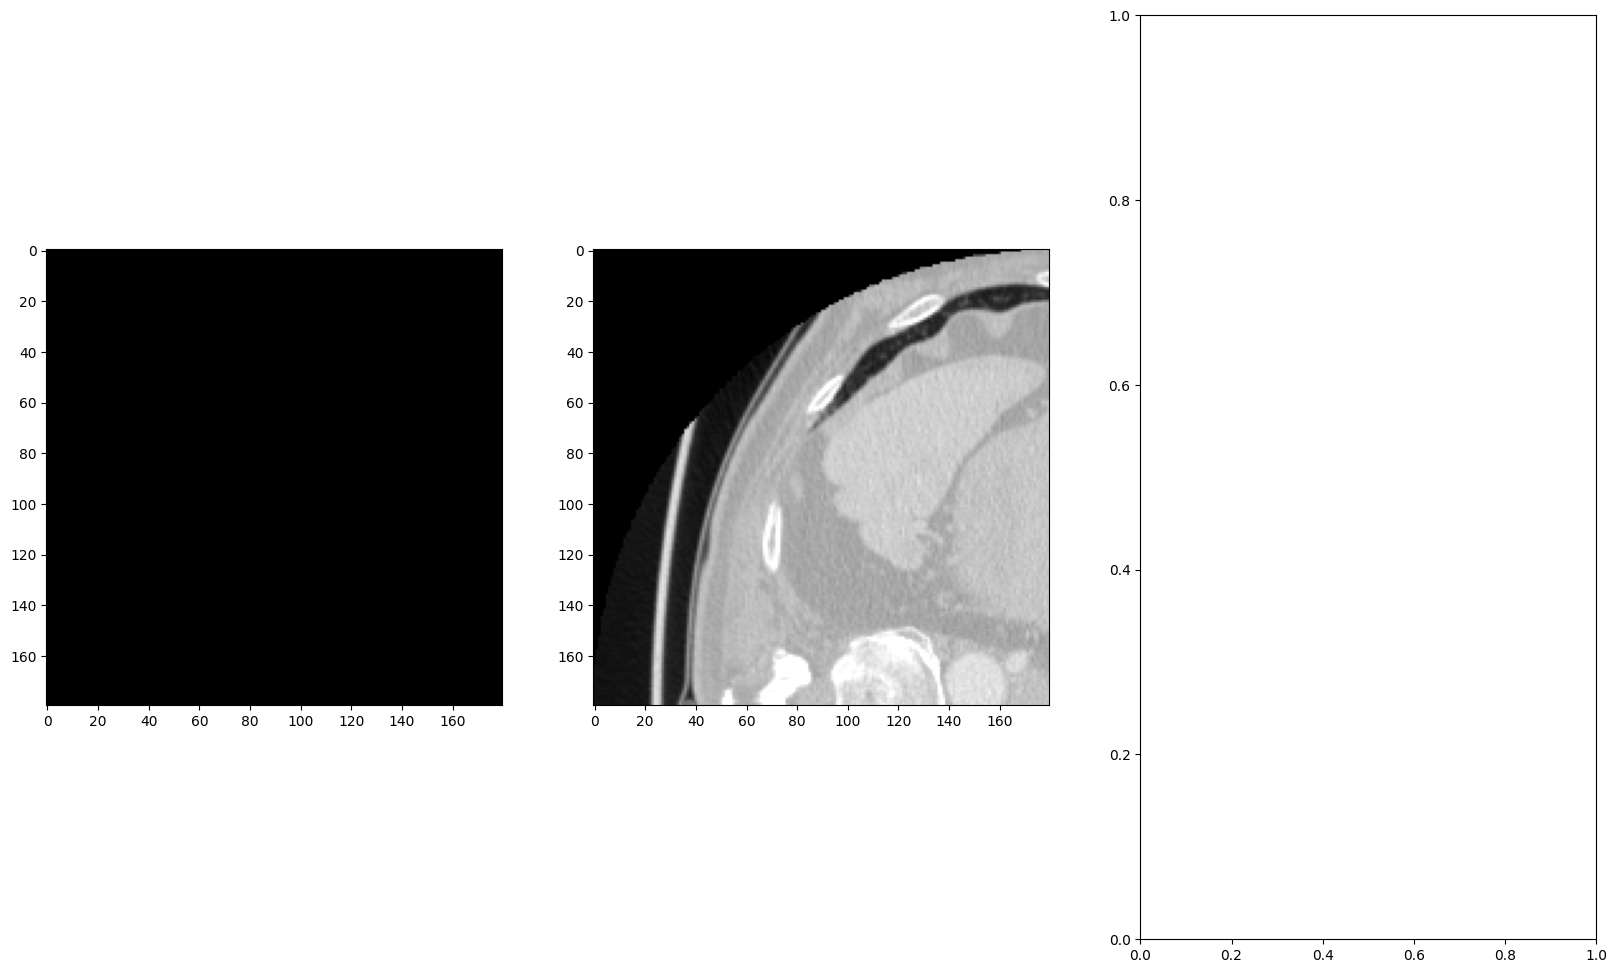

In [4]:
slice_nr = 1

ct_image_1 = np.load('/home/pawel/Documents/RISA/3D_segmentation/dataset/airways/10_CT_HR_0_0_0.npy')
ct_image_2 = np.load('/home/pawel/Documents/RISA/3D_segmentation/dataset/scans/10_CT_HR_0_0_0.npy')
# ct_data = ct_image.get_fdata().astype("int32")

print(ct_image_1[..., slice_nr].shape)

fig, ax = plt.subplots(1, 3, figsize=(20, 12))
ax[0].imshow(ct_image_1[..., slice_nr], cmap="gray")
ax[1].imshow(ct_image_2[..., slice_nr], cmap="gray")

plt.show()